In [2]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Sentiment Scoring Using SentiWordNet

In [3]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [4]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))

    
    return (total_score / len(raw_sentences)) * 100


In [5]:
reviews = pd.read_csv("/Users/lorenzo/Desktop/Sentiment-Analysis-NLP-for-Marketing/data/small_corpus.csv")

In [7]:
reviews.shape

(4500, 9)

In [8]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AH39B9V4C73GM,B00004TC6E,scrotum,"[2, 22]","this game looks good, and the story is great but the game does not deliver the goods. The problem I have most with the game is serge the main character never talks, that is just plain lazyness you just get the feeling that serge is just lifeless and is not intristing at all. Since the game has so many characters in it, it seems that most of the other characters as lifeless as serge and have no pointe in ever bieng introduced to the plot.I feel thair is a limit to the number of characters in a game that will still make the game intristing. And I am sorry Game Informer, but this game does not restore my faith in the modern RPG(you have to read thair great magazine to know what I am talking about) Square could do better, I have seen it done.",1.0,week,981936000,"02 12, 2001"
1,A3L6D4MQ95KTEW,B003JVCA9Q,ACE4x,"[5, 15]","I want to like this game. I really do. But it ""feels"" so much like WaW and I couldn't get into it. The graphics feel choppy and it is no where close to being on par with MW2. Campaign has a good story tho but thats really nothing when the multiplayer blows. A real let down, I was expecting something less than MW2 but not THIS LESS.I was hoping to spend countless hours on this one as i've done with the previous COD's but I just ended up going back to playing my other shooters like MW/MW2 BFBC2 KZ2 and yes, even MOH. Probably gonna sell it.",1.0,Just...Not...Good,1289433600,"11 11, 2010"
2,A3JNTC2Y5J1QKU,B0001AVSH8,Scott,"[2, 3]","this game is horrible. the best part of the game was the training mode, where you could run around and shoot moving targets like duck hunt. even then, the controls were worse than GTA. it's difficult to shoot accurately. the programmers know this, thats why as long as the target turns red, its a hit, even if it looks like a no chance shot. You can drag bodies and switch clothes, but it all seems rather pointless. you can try and sneak around, but it seems like it doesnt matter. you can just kill them however you want anyway. reloading is riduclously slow too, and before you die, time slows down and so it seems like it takes f o r e v e r. There are a lot of other games out there. I don't recommend wasting cash on this one. if you're looking for a shooter like halo, try kill switch. if you're looking for a sneak around game like metal gear, try tenchu. if you're just looking for more violence, take it up a notch and try manhunt. save your money and pass on hitman.",1.0,Garbage,1085356800,"05 24, 2004"
3,A3PVM541IR8EYE,B004CD9X2W,Doug Urquhart,"[1, 4]","I loved the original Alice. Although I am, by gamer standards, somewhat of a codger, I could make my way through the trickier segments by carefully saving before the harder parts, and restoring after the inevitable failure.This is no longer possible in Alice 2 - there's auto-save (determined by position), and that's it. Result? Try to jump a series of obstacles, miss the last jump, and be taken right back to the beginning. I've done this several times now, and I'm stuck at the beginning of the game.This is supposed to be an Adventure game - dexterity and kiddie reflexes shouldn't be important.I've been developing software for nearly half a century - I recognize a shortcut when I see one. Not acceptable.",1.0,No manual save: no boomer appeal.,1353628800,"11 23, 2012"
4,A3QC6IWLGA4YXJ,B004QDV76S,"Julie K. Ladd ""Julie Ladd""","[1, 1]","I was very excited to get this for my husband who talks with his buddies while playing xbox.. he used it for 2 days(I am serious) and it was broken. Sound wasn't coming through, and no one could hear him talking back. Very sad that it didn't work. I can't say that I blaim the company because it may have been damaged by shipping.",1.0,sadly disapointed,1379980800,"09 24, 2013"


In [9]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [10]:
reviews.shape

(4499, 9)

In [17]:
reviews['reviewText']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  this game looks good, and the story is great but the game does not deliver the goods. The problem I have most with the game is serge the main character never talks, that is just plain lazyness you just get the feeling that serge is just  lifeless and is not intristing at all. Since the game has so many characters in it, it seems that most of the other characters as lifeless as serge and

In [18]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))


In [19]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
1418,"This is one of the worst games I've ever played. Bad gameplay. Lame character models. Bad graphics, and just a mess. Make a good LOTR game NOW!",-3.333333
3204,"This is my favorite game of all time. Period. Other games have made bold and valiant attempts, such as Final Fantasy X and Harvest Moon. But none can compare the the masterpiece that is Ogre Battle 64. I have always been a fan of the RPG, and I picked this game up with mild expectations. I hold high standards for my games, you see. And lots of games just dont cut it. They are good, but not great. And thats what I expected from Ogre Battle. But what I got was the most fufilling game adventure of my life. An army, groups in the army, 5 characters to a group, males, females, clases, upgrades of classes, beasts, dragons, undeads, angles, And thats not even including the special people such as Carth, Destin, and Meridia! Then you could go into the customizable weapons and armor. All wraped up into an easly managable batallion at your command. If this isn't gaming bliss, I don't know what is",-0.134409


In [20]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
1820,Bought this game for my grand-son. He's 8 and he got bored with this game right away. It was a bad buy. Just not much fun.,-0.446429
1647,"If you are old enough to be thoroughly considering your options in what game to purchase next, then you are likely old enough to start having more mature tastes by now. A choppy framerate, and a shallow and derisive story cannot be saved by the uncommonly good musical score. Try instead ""Lost Odyssey"", which is an extremely solid choice for those who feel a need to scratch that turn-based RPG itch on the Xbox 360, and a much better value for your time and money.",4.166667


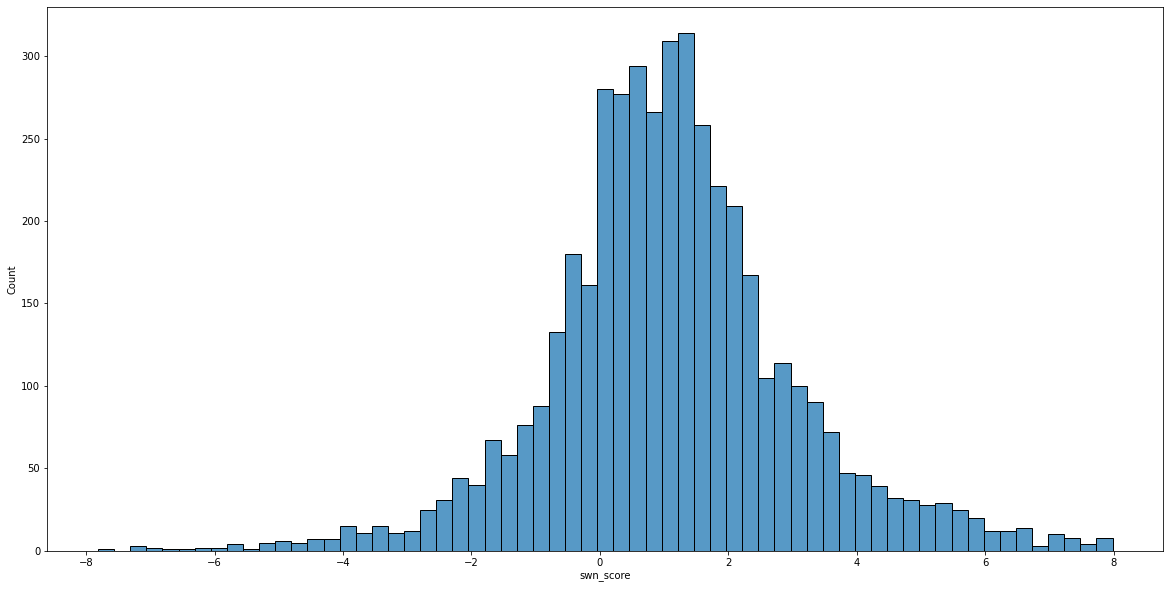

In [21]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [22]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [23]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    2314
negative    1635
neutral      550
Name: swn_sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

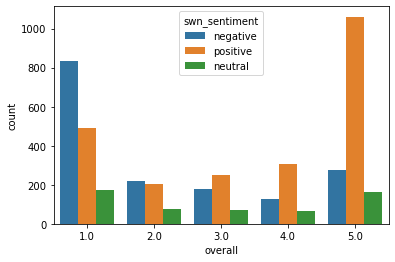

In [24]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<AxesSubplot:xlabel='swn_sentiment', ylabel='overall'>

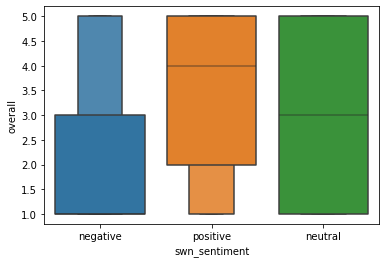

In [25]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

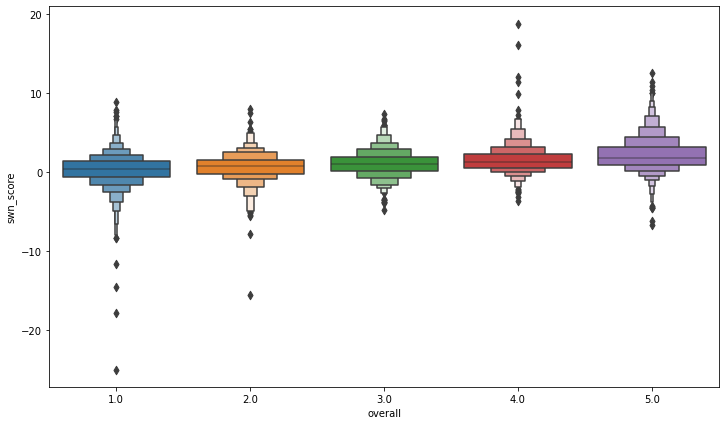

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [27]:
reviews['true_sentiment'] = \
    reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [28]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [29]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

Performance Assessment

Negative Sentiment Prediction Assessment

In [ ]:
tp, tn, fp, fn = 1088, 70+242+142+1310, 265+647, 188+547

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [ ]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

Positive Sentiment Prediction Assessment

In [ ]:
tp, tn, fp, fn = 1310, 1088+265+70+188, 242+647, 142+547

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [ ]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

Sentiment Scoring Model Using NLTK Opinion Lexicon

In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download("opinion_lexicon")

In [ ]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [ ]:
def get_sentiment_score_oplex(text):
    
    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0

    raw_sentences = sent_tokenize(text)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))

    
    return total_score

In [ ]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [ ]:
reviews['oplex_sentiment'] = \
    reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))


In [ ]:
reviews['oplex_sentiment'].value_counts(dropna=False)


In [ ]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

In [ ]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,7))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [ ]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()


In [ ]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)


In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [ ]:
oplex_cm = list(oplex_cm.ravel())

In [ ]:
oplex_cm

Negative Label Assessment

In [ ]:
tp, tn, fp, fn = 804, 195+199+686+1181, 106+132, 701+495

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

Positive Label Assessment

In [ ]:
tp, tn, fp, fn = 1181, 804+701+106+195, 495+199, 132+686

In [ ]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))